# Pandas Datareader

Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame. Currently the following sources are supported:

* Yahoo! Finance
* Google Finance
* Enigma
* St.Louis FED (FRED)
* Kenneth French’s data library
* World Bank
* OECD
* Eurostat
* Thrift Savings Plan
* Oanda currency historical rate
* Nasdaq Trader symbol definitions (remote_data.nasdaq_symbols)

It should be noted, that various sources support different kinds of data, so not all sources implement the same methods and the data elements returned might also differ.

In [1]:
import os
os.environ['HTTP_PROXY'] = "http://atlasproxy.isbank:8080"
os.environ['HTTPS_PROXY'] = "http://atlasproxy.isbank:8080"

In [2]:
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\IS96347\\AppData\\Roaming',
 'CLASSPATH': '.;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2java.zip;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2jcc.jar;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\sqlj.zip;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2jcc_license_cu.jar;C:\\PROGRA~2\\IBM\\SQLLIB\\bin;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\common.jar;C:\\IBM\\RationalSDLC\\ClearQuest\\cqjni.jar',
 'CLEARQUEST_HOME': 'C:\\IBM\\RationalSDLC\\ClearQuest',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'T2LPRVT890',
 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
 'CONDA_DEFAULT_ENV': 'pyfinance',
 'CONDA_EXE': 'C:\\Users\\IS96347\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\conda.exe',
 'CONDA_PREFIX': 'C:\\Users\\IS96347\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyfinance',
 'CONDA_PROMPT_MODIFIER': '(pyfinance) ',


In [3]:
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2015, 1, 1)

end = datetime.datetime(2017, 1, 1)

facebook = web.DataReader("FB", 'google', start, end)

C:\Users\IS96347\AppData\Local\Continuum\anaconda3\envs\pyfinance\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


RemoteDataError: Unable to read URL: https://finance.google.com/finance/historical?q=FB&startdate=Jan+01%2C+2015&enddate=Jan+01%2C+2017&output=csv
Response Text:
b'<html><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>Sorry...</title><style> body { font-family: verdana, arial, sans-serif; background-color: #fff; color: #000; }</style></head><body><div><table><tr><td><b><font face=sans-serif size=10><font color=#4285f4>G</font><font color=#ea4335>o</font><font color=#fbbc05>o</font><font color=#4285f4>g</font><font color=#34a853>l</font><font color=#ea4335>e</font></font></b></td><td style="text-align: left; vertical-align: bottom; padding-bottom: 15px; width: 50%"><div style="border-bottom: 1px solid #dfdfdf;">Sorry...</div></td></tr></table></div><div style="margin-left: 4em;"><h1>We\'re sorry...</h1><p>... but your computer or network may be sending automated queries. To protect our users, we can\'t process your request right now.</p></div><div style="margin-left: 4em;">See <a href="https://support.google.com/websearch/answer/86640">Google Help</a> for more information.<br/><br/></div><div style="text-align: center; border-top: 1px solid #dfdfdf;"><a href="https://www.google.com">Google Home</a></div></body></html>'

In [4]:
facebook.head()

NameError: name 'facebook' is not defined

**Experimental Options**

The Options class allows the download of options data from Google Finance.

The get_options_data method downloads options data for specified expiry date and provides a formatted DataFrame with a hierarchical index, so its easy to get to the specific option you want.

Available expiry dates can be accessed from the expiry_dates property.

In [5]:
from pandas_datareader.data import Options

fb_options = Options('FB', 'google')

ImmediateDeprecationError: 
Google Options has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [6]:
data = fb_options.get_options_data(expiry=fb_options.expiry_dates[0])

NameError: name 'fb_options' is not defined

In [7]:
data.head()

NameError: name 'data' is not defined

## FRED

In [8]:
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2017, 1, 1)

gdp = web.DataReader("GDP", "fred", start, end)

In [9]:
gdp.head()

,GDP
DATE,
2010-01-01,14681.063
2010-04-01,14888.600
2010-07-01,15057.660
2010-10-01,15230.208
2011-01-01,15238.371


# Quandl

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import quandl

**Make a Basic Data Call**

In [12]:
mydata = quandl.get("EIA/PET_RWTC_D")

In [13]:
mydata.head()

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


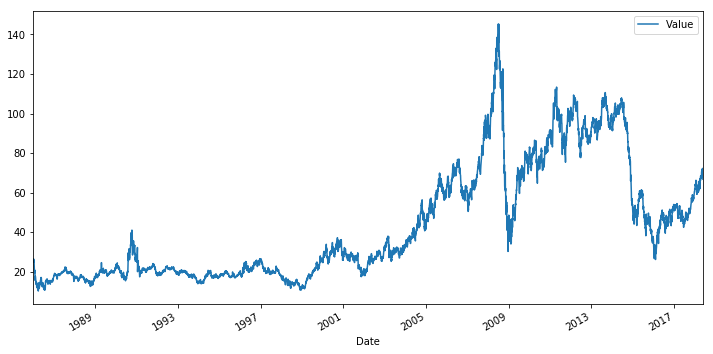

In [14]:
mydata.plot(figsize=(12,6))

**Change Formats**

In [15]:
mydata = quandl.get("EIA/PET_RWTC_D", returns="numpy")

In [16]:
mydata

rec.array([(datetime.datetime(1986, 1, 2, 0, 0),  25.56),
           (datetime.datetime(1986, 1, 3, 0, 0),  26.  ),
           (datetime.datetime(1986, 1, 6, 0, 0),  26.53), ...,
           (datetime.datetime(2018, 5, 24, 0, 0),  70.77),
           (datetime.datetime(2018, 5, 25, 0, 0),  67.92),
           (datetime.datetime(2018, 5, 29, 0, 0),  66.8 )], 
          dtype=[('Date', 'O'), ('Value', '<f8')])

**Specifying Data**

In [17]:
mydata = quandl.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31")

In [18]:
mydata.head()

,Value
Date,
2002-01-01,10834.445
2002-04-01,10934.752
2002-07-01,11037.057
2002-10-01,11103.834
2003-01-01,11230.078


In [19]:
mydata = quandl.get(["NSE/OIL.1", "WIKI/AAPL.4"])

In [20]:
mydata.head()

,NSE/OIL - Open,WIKI/AAPL - Close
Date,,
1980-12-12,NaN,28.75
1980-12-15,NaN,27.25
1980-12-16,NaN,25.25
1980-12-17,NaN,25.87
1980-12-18,NaN,26.63


**Usage Limits**

The Quandl Python module is free. If you would like to make more than 50 calls a day, however, you will need to create a free Quandl account and set your API key:

In [ ]:
quandl.ApiConfig.api_key = "YOUR_KEY_HERE"
mydata = quandl.get("FRED/GDP")

## Database Codes

Each database on Quandl has a short (3-to-6 character) database ID.  For example:

* CFTC Commitment of Traders Data: CFTC
* Core US Stock Fundamentals: SF1
* Federal Reserve Economic Data: FRED

Each database contains many datasets.  Datasets have their own IDs which are appended to their parent database ID, like this:

* Commitment of traders for wheat:  CFTC/W_F_ALL
* Market capitalization for Apple:  SF1/AAPL_MARKETCAP
* US civilian unemployment rate:  FRED/UNRATE

You can download all dataset codes in a database in a single API call, by appending  /codes to your database request.  The call will return a ZIP file containing a CSV.

### Databases


Every Quandl code has 2 parts: the database code (“WIKI”) which specifies where the data comes from, and the dataset code (“FB”) which identifies the specific time series you want.

You can find Quandl codes on their website, using their data browser.

https://www.quandl.com/search

In [21]:
mydata = quandl.get('WIKI/FB',start_date='2015-01-01',end_date='2017-01-01')

In [22]:
mydata.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,78.58,78.9300,77.700,78.450,18177475.0,0.0,1.0,78.58,78.9300,77.700,78.450,18177475.0
2015-01-05,77.98,79.2455,76.860,77.190,26452191.0,0.0,1.0,77.98,79.2455,76.860,77.190,26452191.0
2015-01-06,77.23,77.5900,75.365,76.150,27399288.0,0.0,1.0,77.23,77.5900,75.365,76.150,27399288.0
2015-01-07,76.76,77.3600,75.820,76.150,22045333.0,0.0,1.0,76.76,77.3600,75.820,76.150,22045333.0
2015-01-08,76.74,78.2300,76.080,78.175,23960953.0,0.0,1.0,76.74,78.2300,76.080,78.175,23960953.0


In [23]:
mydata = quandl.get('WIKI/FB.1',start_date='2015-01-01',end_date='2017-01-01')

In [24]:
mydata.head()

,Open
Date,
2015-01-02,78.58
2015-01-05,77.98
2015-01-06,77.23
2015-01-07,76.76
2015-01-08,76.74


In [25]:
mydata = quandl.get('WIKI/FB.7',start_date='2015-01-01',end_date='2017-01-01')

In [26]:
mydata.head()

,Split Ratio
Date,
2015-01-02,1.0
2015-01-05,1.0
2015-01-06,1.0
2015-01-07,1.0
2015-01-08,1.0


### Housing Price Example

**Zillow Home Value Index (Metro): Zillow Rental Index - All Homes - San Francisco, CA**

The Zillow Home Value Index is Zillow's estimate of the median market value of zillow rental index - all homes within the metro of San Francisco, CA. This data is calculated by Zillow Real Estate Research (www.zillow.com/research) using their database of 110 million homes.

In [27]:
houses = quandl.get('ZILLOW/M11_ZRIAH')

In [28]:
houses.head()

,Value
Date,
2010-11-30,2241.0
2010-12-31,2254.0
2011-01-31,2276.0
2011-02-28,2305.0
2011-03-31,2335.0


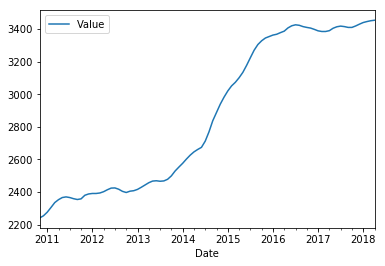

In [29]:
houses.plot()